# Aprendizado não supervisionado
A documentação necessário das ferramentas usadas podem ser vistitadas em:

- [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [1]:
!wget -c https://github.com/sullyvan15/datasets/raw/master/convento_da_penha-ES.jpg -O convento_da_penha-ES.jpg

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import  matplotlib.pyplot as plt
from PIL import Image

--2020-12-05 03:13:12--  https://github.com/rhuam/datasets/raw/master/convento_da_penha-ES.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rhuam/datasets/master/convento_da_penha-ES.jpg [following]
--2020-12-05 03:13:12--  https://raw.githubusercontent.com/rhuam/datasets/master/convento_da_penha-ES.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253119 (247K) [image/jpeg]
Saving to: ‘convento_da_penha-ES.jpg’

convento_da_penha-E 100%[===================>] 247.19K  --.-KB/s    in 0.04s   

2020-12-05 03:13:13 (6.33 MB/s) - ‘convento_da_penha-ES.jpg’ saved [253119/253119]



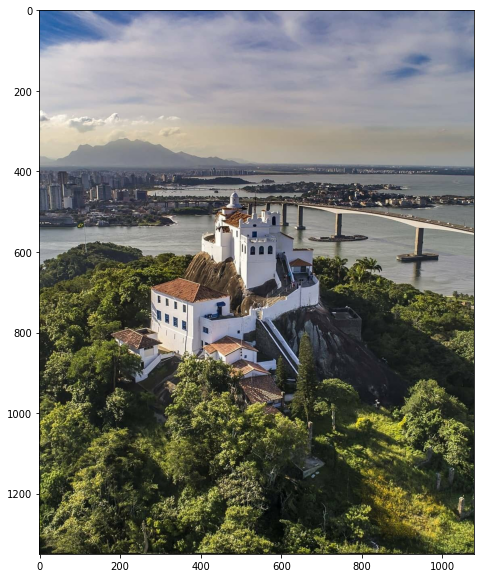

In [2]:
plt.figure(figsize=(20, 10))

imagem = Image.open("convento_da_penha-ES.jpg")

plt.imshow(imagem)
plt.show()

In [3]:
imagem = np.array(imagem)
print(imagem.shape)

(1350, 1080, 3)


## Normalização dos dados

In [4]:
data = imagem / 255.0
data = data.reshape(1350*1080, 3)

print(data.shape)

(1458000, 3)


## Visualizar espaço de cores

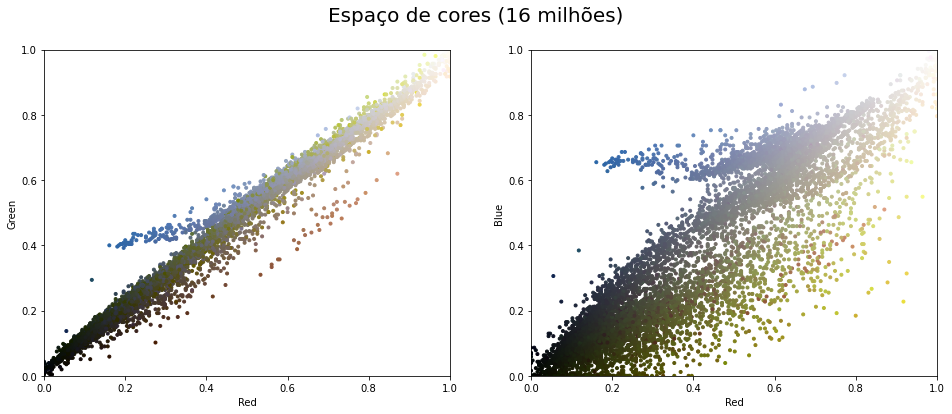

In [5]:
def plot_pixels(data, colors=None, title=''):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(123)
    i = rng.permutation((data.shape[0]))[:10000]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

plot_pixels(data, title='Espaço de cores (16 milhões)')

## Treinar algoritmo
### K-Means


In [6]:
from sklearn.cluster import MiniBatchKMeans

clf_kmeans = MiniBatchKMeans(16)
clf_kmeans.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=16, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

## Predição

[[0.42374245 0.49560895 0.64709706]
 [0.42374245 0.49560895 0.64709706]
 [0.42374245 0.49560895 0.64709706]
 ...
 [0.13890012 0.15179183 0.10349222]
 [0.13890012 0.15179183 0.10349222]
 [0.08019267 0.09400112 0.05720049]]


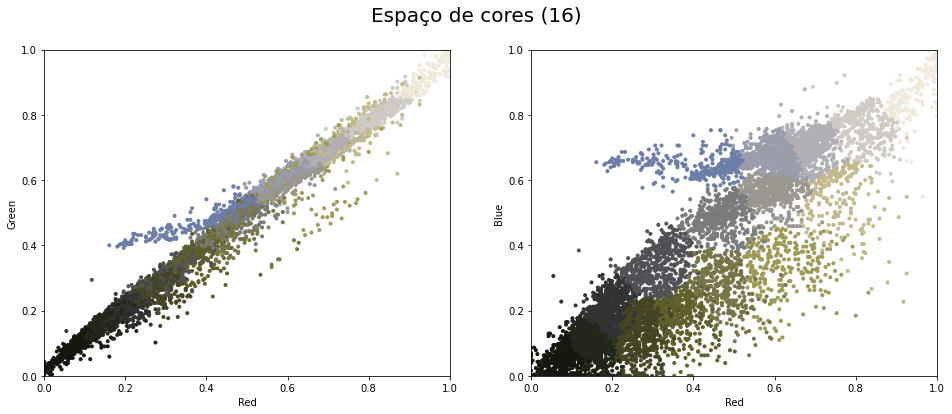

In [7]:
new_colors = clf_kmeans.cluster_centers_[clf_kmeans.predict(data)]

print(new_colors)
plot_pixels(data, colors=new_colors, title='Espaço de cores (16)')

## Avaliar modelos

Text(0.5, 1.0, 'Imagem com 16 cores')

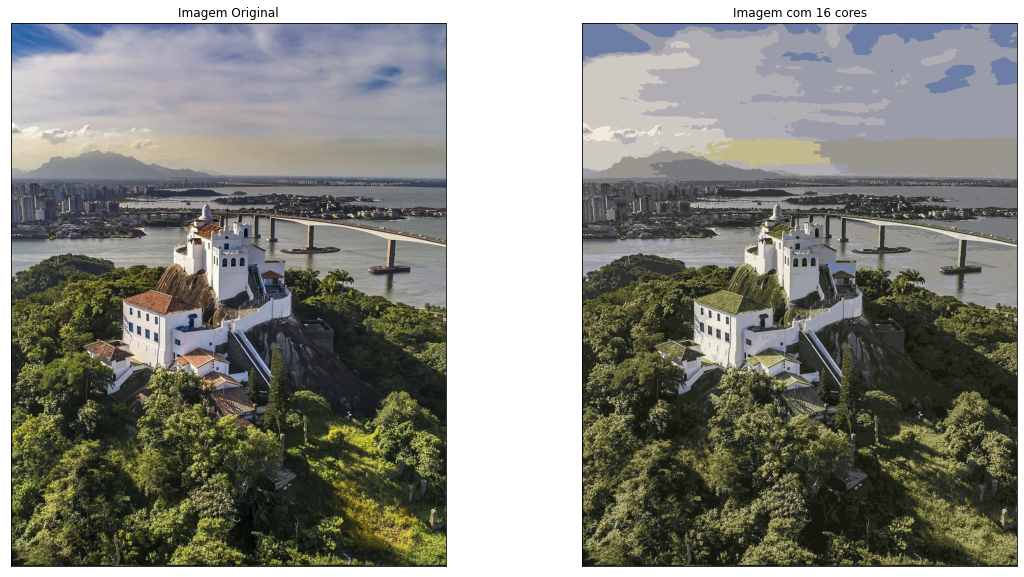

In [8]:
imagem_recolorida = new_colors.reshape(imagem.shape)

fig, ax = plt.subplots(1,2, figsize=(20,10),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(imagem)
ax[0].set_title('Imagem Original')

ax[1].imshow(imagem_recolorida)
ax[1].set_title('Imagem com 16 cores')